In [16]:
from cmdstanpy import CmdStanModel


import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets, linear_model

In [2]:
_BASE_URL = "https://raw.githubusercontent.com/rmcelreath/rethinking/Experimental/data"
HOWELL_DATASET_PATH = f"{_BASE_URL}/Howell1.csv"
d = pd.read_csv(HOWELL_DATASET_PATH, sep=';', header=0)
d=d[d.age>=18] #just adults 
d.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0


In [4]:
model_ppc=CmdStanModel(stan_file='height_1_ppc.stan')

R = 1000
sim=model_ppc.sample(iter_sampling=R,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True,
                     seed=29042020,refresh=R)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


## Task1. Prior predictive checks

In [23]:
df = sim.draws_pd()
df

,lp__,accept_stat__,mu,sigma,height
0,0.0,0.0,232.163,8.126140,217.968
1,0.0,0.0,188.640,70.331700,297.765
2,0.0,0.0,170.755,11.778900,178.482
3,0.0,0.0,182.602,19.518000,217.971
4,0.0,0.0,152.394,4.678490,159.762
...,...,...,...,...,...
995,0.0,0.0,178.704,0.038448,178.692
996,0.0,0.0,172.086,5.345250,171.941
997,0.0,0.0,188.423,12.742400,183.248
998,0.0,0.0,154.132,4.810070,151.071


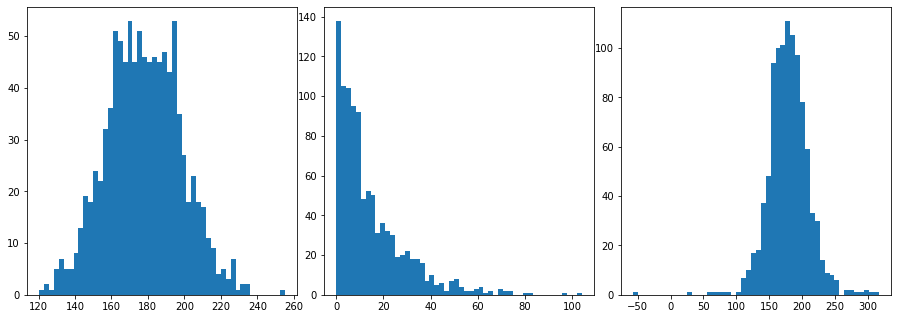

In [26]:
mu = sim.stan_variable('mu')
sigma = sim.stan_variable('sigma')
height = sim.stan_variable('height')

bin=50
fig,axs = plt.subplots(1,3,figsize=(15,5))
axs[0].hist(mu ,bins = bin)
axs[1].hist(sigma,bins = bin)
axs[2].hist(height, bins = bin)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.1, hspace=0.1)

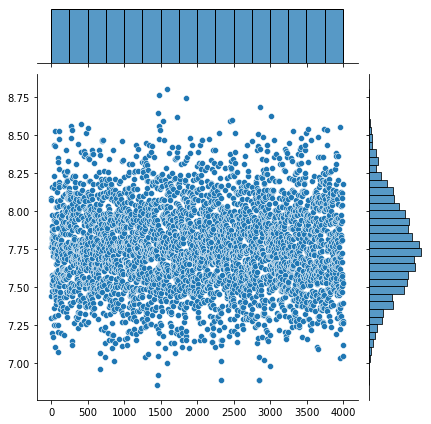

In [18]:
sns.jointplot(data = sigma)

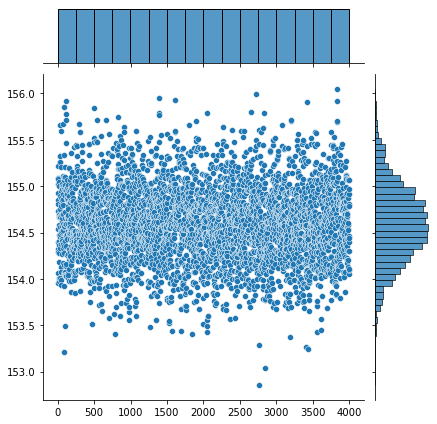

In [19]:
sns.jointplot(data = mu)

Task 1.3, 1.4 - No

TASK 2

In [20]:
model_1_fit=CmdStanModel(stan_file='height_1_fit.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [21]:
fit=model_1_fit.sample(data=dict(N=len(d),
                                   heights=d.height.values),
                         seed=28052020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status




chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)
chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       

chain 3 |██████████| 00:00 Sampling completed


chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [22]:
df1 = fit.draws_pd()
df1

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,mu,sigma,height
0,-896.376,1.000000,0.931337,1.0,1.0,0.0,897.275,155.086,7.44077,152.910
1,-896.199,0.875105,0.931337,2.0,3.0,0.0,898.135,155.221,7.76737,165.595
2,-895.899,0.995676,0.931337,2.0,7.0,0.0,896.671,154.399,8.09131,157.325
3,-896.388,0.965487,0.931337,2.0,3.0,0.0,896.697,154.734,7.29935,160.197
4,-895.746,1.000000,0.931337,2.0,3.0,0.0,896.559,154.538,8.07794,149.171
...,...,...,...,...,...,...,...,...,...,...
3995,-896.671,0.950270,0.783076,3.0,7.0,0.0,898.449,154.097,7.39481,168.263
3996,-897.297,0.893170,0.783076,1.0,1.0,0.0,897.448,154.108,7.27665,150.053
3997,-899.107,0.783917,0.783076,2.0,3.0,0.0,901.567,155.063,7.04664,158.643
3998,-897.801,1.000000,0.783076,3.0,7.0,0.0,899.526,154.401,7.12068,161.512


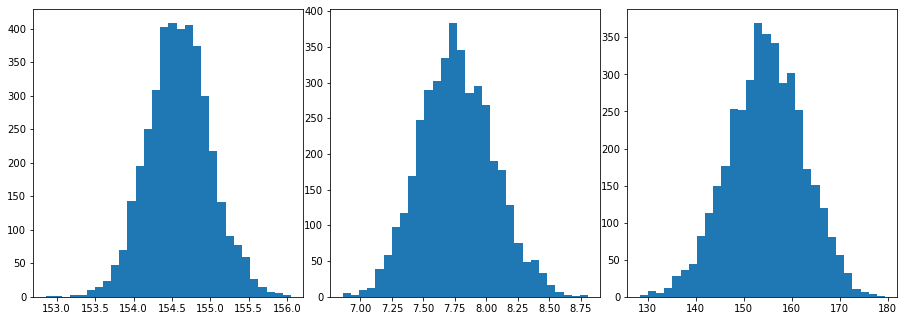

In [29]:
bin =30
mu = fit.stan_variable('mu')
sigma = fit.stan_variable('sigma')
height = fit.stan_variable('height')

fig,axs = plt.subplots(1,3,figsize=(15,5))
axs[0].hist(mu ,bins = bin)
axs[1].hist(sigma,bins = bin)
axs[2].hist(height, bins = bin)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.1, hspace=0.1)

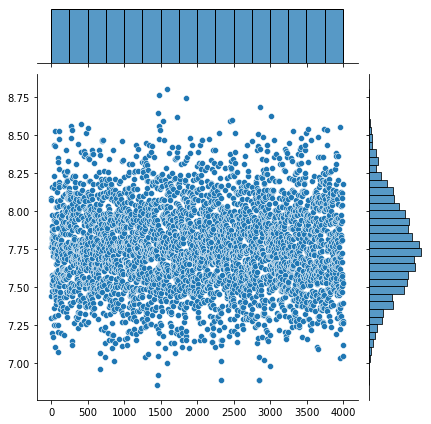

In [30]:
sns.jointplot(data = sigma)

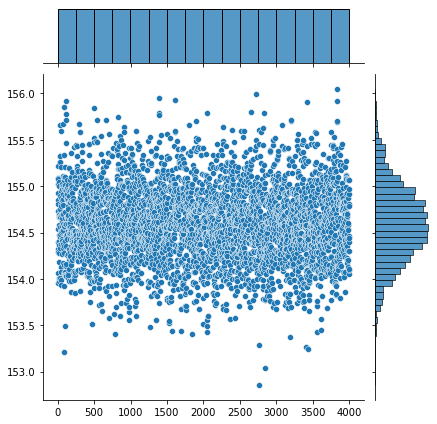

In [31]:
sns.jointplot(data = mu)

Adding predictor to the model - weight

In [33]:
d['c_weight'] = abs(d['weight'] - d['weight'].mean())
d

,height,weight,age,male,c_weight
0,151.765,47.825606,63.0,1,2.835121
1,139.700,36.485807,63.0,0,8.504679
2,136.525,31.864838,65.0,0,13.125648
3,156.845,53.041914,41.0,1,8.051429
4,145.415,41.276872,51.0,0,3.713614
...,...,...,...,...,...
534,162.560,47.031821,27.0,0,2.041335
537,142.875,34.246196,31.0,0,10.744290
540,162.560,52.163080,31.0,1,7.172594
541,156.210,54.062497,21.0,0,9.072011


TASK 4

In [38]:
model_ppc=CmdStanModel(stan_file='height_2a_ppc.stan')
R = 1000

data_sim={'N':50, 'weight':np.linspace(d.c_weight.min(),d.c_weight.max())}
sim=model_ppc.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

INFO:cmdstanpy:compiling stan file /Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/L04/height_2a_ppc.stan to exe file /Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/L04/height_2a_ppc
INFO:cmdstanpy:compiled model executable: /Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/L04/height_2a_ppc
--- Translating Stan model to C++ code ---
bin/stanc  --o=/Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/L04/height_2a_ppc.hpp /Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/L04/height_2a_ppc.stan
Warning in '/Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/L04/height_2a_ppc.stan', line 3, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/L04/height_2a_ppc.stan', line 10, column 8: Declaration
 


INFO:cmdstanpy:CmdStan done processing.


In [40]:
df = sim.draws_pd()
df

,lp__,accept_stat__,alpha,beta,sigma,height[1],height[2],height[3],height[4],height[5],...,height[41],height[42],height[43],height[44],height[45],height[46],height[47],height[48],height[49],height[50]
0,0.0,0.0,232.163,2.175330,23.208300,235.125,200.717,239.475,262.382,287.935,...,291.117,308.628,301.457,272.5610,235.242,255.629,262.6100,287.451,277.146,286.262
1,0.0,0.0,154.022,0.993243,0.086958,154.127,154.453,154.816,155.219,155.587,...,168.850,168.981,169.269,169.6990,169.995,170.487,170.7170,171.163,171.651,171.895
2,0.0,0.0,169.461,0.320255,20.358900,198.299,165.746,166.432,182.133,177.951,...,209.770,147.300,205.212,181.3640,214.505,174.957,195.1300,184.132,174.297,179.572
3,0.0,0.0,158.357,0.775342,6.415610,166.884,154.409,157.529,153.095,158.081,...,173.335,171.030,172.835,179.8120,168.069,168.101,177.1870,168.673,174.633,170.029
4,0.0,0.0,158.131,5.317560,9.955320,132.146,154.198,154.235,156.289,178.833,...,251.927,251.280,232.908,243.9140,242.722,241.556,242.7100,257.497,257.633,245.757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,161.753,3.529990,6.017940,167.690,153.446,164.954,165.829,168.312,...,217.218,200.335,221.466,215.5990,234.845,218.519,221.2890,235.574,221.463,219.232
996,0.0,0.0,196.362,3.398650,10.413300,203.343,204.102,194.514,202.034,187.222,...,241.416,253.396,254.241,232.2330,260.659,248.110,232.5070,269.027,252.878,255.570
997,0.0,0.0,172.792,0.761815,76.805200,135.376,269.200,234.524,181.659,197.221,...,133.613,151.219,230.486,46.5225,193.988,248.890,98.4224,208.352,125.408,149.205
998,0.0,0.0,126.115,2.683600,23.204300,146.850,132.681,123.826,141.938,159.541,...,158.801,161.814,123.709,148.7170,195.279,165.448,198.2450,147.373,141.460,179.422


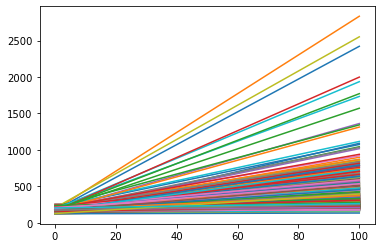

max:  668.345
min:  -154.275


In [41]:
alpha = sim.stan_variable('alpha')
beta = sim.stan_variable('beta')

for i in range(len(alpha)) :
    x = np.array([0, 100])
    y = beta[i] * x + alpha[i]
    plt.plot(x, y)
 
plt.show()

print('max: ', np.max(sim.stan_variable('height')))
print('min: ', np.min(sim.stan_variable('height')))

In [44]:
model_ppc=CmdStanModel(stan_file='height_2b_ppc.stan')

INFO:cmdstanpy:compiling stan file /Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/L04/height_2b_ppc.stan to exe file /Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/L04/height_2b_ppc
INFO:cmdstanpy:compiled model executable: /Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/L04/height_2b_ppc
--- Translating Stan model to C++ code ---
bin/stanc  --o=/Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/L04/height_2b_ppc.hpp /Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/L04/height_2b_ppc.stan
Warning in '/Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/L04/height_2b_ppc.stan', line 3, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/L04/height_2b_ppc.stan', line 10, column 8: Declaration
 

In [45]:
sim=model_ppc.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


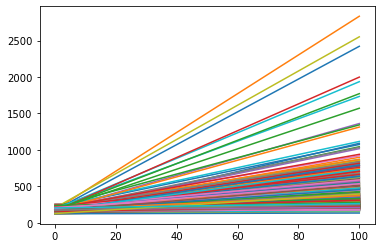

max:  668.345
min:  -154.275


In [46]:
alpha = sim.stan_variable('alpha')
beta = sim.stan_variable('beta')

for i in range(len(alpha)) :
    x = np.array([0, 100])
    y = beta[i] * x + alpha[i]
    plt.plot(x, y)
 
plt.show()

print('max: ', np.max(sim.stan_variable('height')))
print('min: ', np.min(sim.stan_variable('height')))

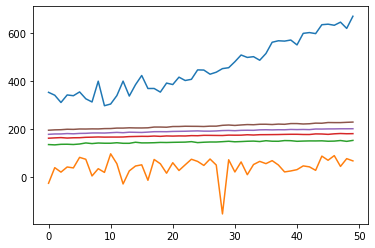

In [47]:
max = []
min = []

quantiles = {}
quantiles['q1'] = []
quantiles['q2'] = []
quantiles['q3'] = []
quantiles['q4'] = []
quantiles['q5'] = []
height = sim.stan_variable('height')
for i in range(height.shape[1]):
    heights = height[:,i] 
    max.append(np.max(heights))
    min.append(np.min(heights))

  
    quantiles['q1'].append(np.quantile(heights, 0.05))
    quantiles['q2'].append(np.quantile(heights, 0.25))
    quantiles['q3'].append(np.quantile(heights, 0.5))
    quantiles['q4'].append(np.quantile(heights, 0.75))
    quantiles['q5'].append(np.quantile(heights, 0.95))

plt.plot(max)
plt.plot(min)


for i in range(1,len(quantiles.keys())):
    plt.plot(quantiles['q'+str(i)])

plt.show()

In [49]:
model_2_fit=CmdStanModel(stan_file='height_2_fit.stan')

INFO:cmdstanpy:compiling stan file /Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/L04/height_2_fit.stan to exe file /Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/L04/height_2_fit
INFO:cmdstanpy:compiled model executable: /Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/L04/height_2_fit
--- Translating Stan model to C++ code ---
bin/stanc  --o=/Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/L04/height_2_fit.hpp /Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/L04/height_2_fit.stan
Warning in '/Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/L04/height_2_fit.stan', line 4, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/L04/height_2_fit.stan', line 26, column 4: Declaration
    of a

In [50]:
N = 200
data_fit={'N': N, 'weight': d['weight'].head(N), 'heights': d['height'].head(N)}


fit=model_2_fit.sample(data=data_fit,seed=28052020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status



chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)

chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)

chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)



chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)

chain 1 |███▏      | 00:01 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |████      | 00:01 Iteration:  700 / 2000 [ 35%]  (Warmup)




chain 1 |█████     | 00:01 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)




chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)



chain 1 |███████▎  | 00:02 Iteration: 1300 / 2000 [ 65%]  (Sampling)

chain 1 |███████▋  | 00:02 Iteration: 1400 / 2000 [ 70%]  (Sampling)



chain 1 |████████▏ | 00:02 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |████████▋ | 00:02 Iteration: 1600 / 2


INFO:cmdstanpy:CmdStan done processing.


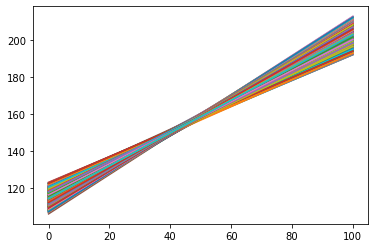

max:  668.345
min:  -154.275


In [51]:
alpha = fit.stan_variable('alpha')
beta = fit.stan_variable('beta')

for i in range(len(alpha)) :
    x = np.array([0, 100])
    y = beta[i] * x + alpha[i]
    plt.plot(x, y)
 
plt.show()

print('max: ', np.max(sim.stan_variable('height')))
print('min: ', np.min(sim.stan_variable('height')))

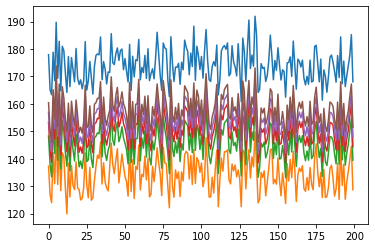

In [52]:
max = []
min = []

quantiles = {}
quantiles['q1'] = []
quantiles['q2'] = []
quantiles['q3'] = []
quantiles['q4'] = []
quantiles['q5'] = []
height = fit.stan_variable('height')
for i in range(height.shape[1]):
    heights = height[:,i] 
    max.append(np.max(heights))
    min.append(np.min(heights))

  
    quantiles['q1'].append(np.quantile(heights, 0.05))
    quantiles['q2'].append(np.quantile(heights, 0.25))
    quantiles['q3'].append(np.quantile(heights, 0.5))
    quantiles['q4'].append(np.quantile(heights, 0.75))
    quantiles['q5'].append(np.quantile(heights, 0.95))

plt.plot(max)
plt.plot(min)


for i in range(1,len(quantiles.keys())):
    plt.plot(quantiles['q'+str(i)])

plt.show()